In [29]:
import pandas as pd
import numpy as np
import pickle
import os
import sys
import matplotlib.pyplot as plt
import math

In [30]:
x_train = pickle.load(open('data/train_x_raw.sav','rb'))
y_train = pickle.load(open('data/train_y_raw.sav','rb'))
x_test = pickle.load(open('data/test_x_raw.sav','rb'))
y_test = pickle.load(open('data/test_y_raw.sav','rb'))


In [31]:
x_train

array(['Triển lãm MEVS - triển lãm dành riêng cho xe điện sẽ diễn ra tại Sân vận động Olympic Montreal từ ngày 21-23/4/2023 với sự xuất hiện của hơn 50 mẫu xe điện đến từ hơn 20 thương hiệu ô tô trên thế giới.Lần đầu tham dự MEVS 2023, VinFast sẽ giới thiệu 2 mẫu xe điện chủ lực của năm nay là VF 8 và VF 9. Khách tham quan có thể tìm hiểu thông tin sản phẩm và chính sách bán hàng của VinFast.Bà Nguyễn Thị Vân Anh, Tổng Giám đốc VinFast Bắc Mỹ chia sẻ: “Là một thương hiệu thuần điện, với mục tiêu thúc đẩy cuộc cách mạng xe điện toàn cầu, VinFast tự hào góp mặt tại triển lãm xe điện lớn nhất Canada ngay sau Triển lãm Ô tô Quốc tế Montreal hồi tháng 1. VinFast cũng đã ra mắt người tiêu dùng Canada thông qua cửa hàng VinFast Store mở tại Laval. Và giờ đây, chúng tôi rất hào hứng được mang đến cơ hội được lái thử chiếc xe VF 8 lần đầu tiên cho khách hàng Quebec.”VF 8 hiện là mẫu xe chủ đạo của VinFast tại các thị trường quốc tế. VF 8 bản Eco có giá từ $57.500 CAD và VF 8 Plus có giá từ $63.

In [32]:
y_train

array(['Kinh te', 'Du lich', 'San pham tin hoc moi', ..., 'Chung khoan',
       'Mua sam', 'Giao duc'], dtype=object)

In [33]:
x_test

array(["Trình duyệt Netscape 'hồi sinh'\nCông cụ duyệt web của AOL cuối cùng lại không chết như giới phân tích từng nhận định năm ngoái. America Online vừa công bố gói phần mềm nâng cấp Netscape Internet và một số ứng dụng desktop sắp sửa được tung ra vào tháng tới.\nChương trình update này nằm trong một nỗ lực quy mô lớn của AOL nhằm thổi một sức sống mới vào thương hiệu Netscape mà họ mua lại năm 1998 với giá 4,2 tỷ USD. Phiên bản nâng cấp 7.2 sẽ thay thế phần mềm 7.1 mà họ tung ra giữa năm ngoái. Browser mới sẽ dựa trên nền phiên bản 1.7 của trình duyệt Mozilla, một phần mềm sắp được tung ra trong bộ ứng dụng Mozilla Internet.\nBản Netscape 7.1 hiện hành dựa trên Mozilla 1.4, một trình duyệt xuất hiện lần đầu tiên vào tháng 6 năm 2003. Bản thử nghiệm beta của Mozilla 1.7 được phát hành tháng trước. Gói phần mềm này bao gồm một browser, công cụ e-mail và tiện ích tập tin newsgroup cùng với ứng dụng nhắn tin nhanh và một số tính năng khác như biên tập trang web, chống pop-up&\nBên cạn

In [34]:
y_test

array(['San pham tin hoc moi', 'The gioi tre', 'Mua sam', ...,
       'San pham tin hoc moi', 'Am nhac', 'Cum ga'], dtype=object)

In [35]:
def sentence_len(text):
    return len(text.split(" "))
# old_size_data = 0
# n = 0
# for content in x_train:
#     old_size_data += sentence_len(content)
#     n += 1
# print("Do dai trung binh cua tap du lieu truoc xu li: ", old_size_data / n)
old_size = []
for content in x_train:
    old_size.append(sentence_len(content))
print("Do dai trung binh cua tap du lieu truoc tien xu li: ", np.mean(old_size))

Do dai trung binh cua tap du lieu truoc tien xu li:  530.2749509891285


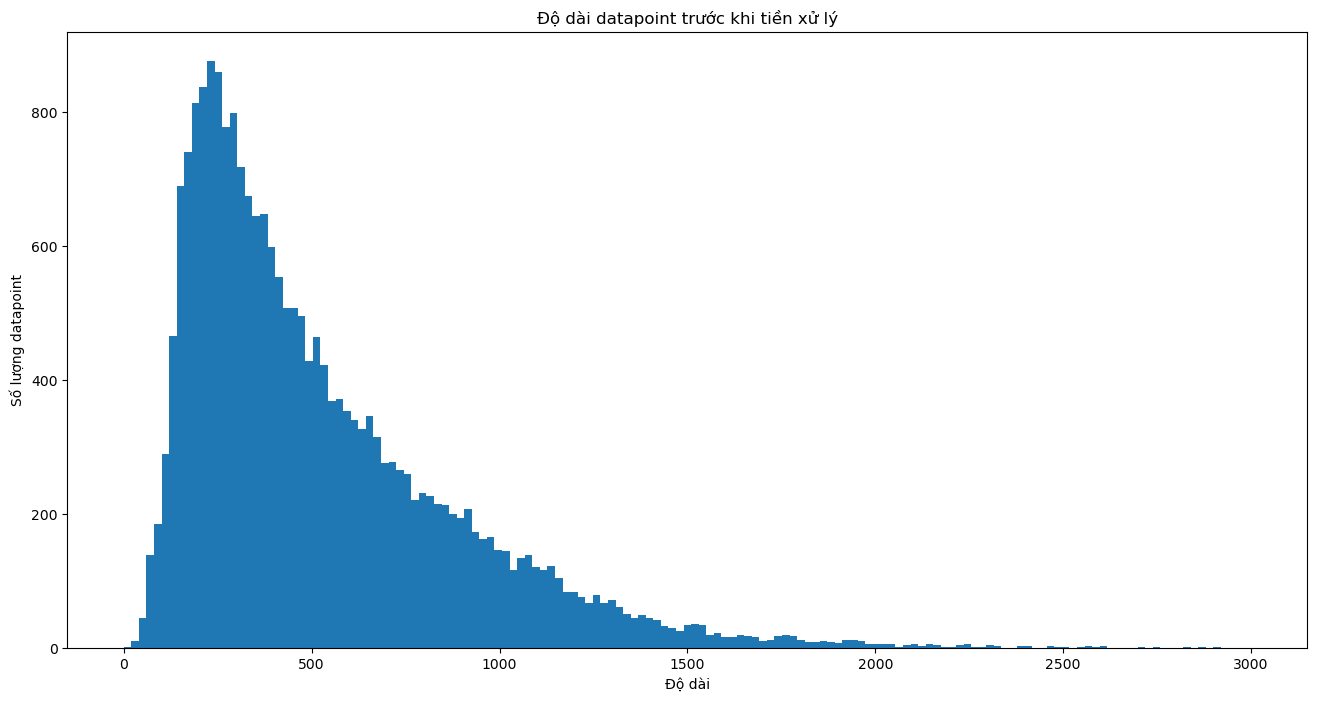

In [36]:
plt.figure(figsize=(16, 8))
plt.title("Độ dài datapoint trước khi tiền xử lý")
plt.xlabel('Độ dài')
plt.ylabel('Số lượng datapoint')
plt.hist(np.array(old_size), bins=int(math.sqrt(len(old_size))), range=(0, 3000))
plt.savefig('image/dataset_before_preprocess.png', facecolor='whitesmoke', bbox_inches='tight')
plt.show()

In [37]:
old_nums_word = set()
for content in x_train:
    old_nums_word.update(content.split())
print("So tu truoc tien xu ly du lieu: ",len(old_nums_word))

So tu truoc tien xu ly du lieu:  240833


In [45]:
nums_labels = {}
labels = np.unique(y_train)
print('Train:')
count = 0
for label in labels:
    nums_labels[label] = np.count_nonzero(y_train == label)
    print(f'{label}: {np.count_nonzero(y_train == label)}')
    count += np.count_nonzero(y_train == label)
print(f'Total: {count}')


print('Test:')
count = 0
for label in labels:
    print(f'{label}: {np.count_nonzero(y_test == label)}')
    count += np.count_nonzero(y_test == label)
print(f'Total: {count}')

Train:
Am nhac: 1296
Am thuc: 528
Bat dong san: 458
Bong da: 2567
Chung khoan: 513
Cum ga: 661
Cuoc song do day: 1174
Du hoc: 765
Du lich: 1102
Duong vao WTO: 289
Gia dinh: 375
Giai tri tin hoc: 1328
Giao duc: 1348
Gioi tinh: 446
Hackers va Virus: 489
Hinh su: 395
Khong gian song: 150
Kinh doanh quoc te: 985
Kinh te: 540
Lam dep: 1077
Loi song: 425
Mua sam: 206
My thuat: 259
San khau dien anh: 1667
San pham tin hoc moi: 1093
Suc khoe: 165
Tennis: 630
The gioi tre: 759
Thoi trang: 542
Xe co: 212
Total: 22444
Test:
Am nhac: 555
Am thuc: 227
Bat dong san: 196
Bong da: 1100
Chung khoan: 220
Cum ga: 283
Cuoc song do day: 504
Du hoc: 328
Du lich: 473
Duong vao WTO: 124
Gia dinh: 161
Giai tri tin hoc: 570
Giao duc: 578
Gioi tinh: 191
Hackers va Virus: 209
Hinh su: 169
Khong gian song: 64
Kinh doanh quoc te: 422
Kinh te: 231
Lam dep: 461
Loi song: 182
Mua sam: 88
My thuat: 111
San khau dien anh: 715
San pham tin hoc moi: 469
Suc khoe: 71
Tennis: 270
The gioi tre: 325
Thoi trang: 232
Xe co: 91


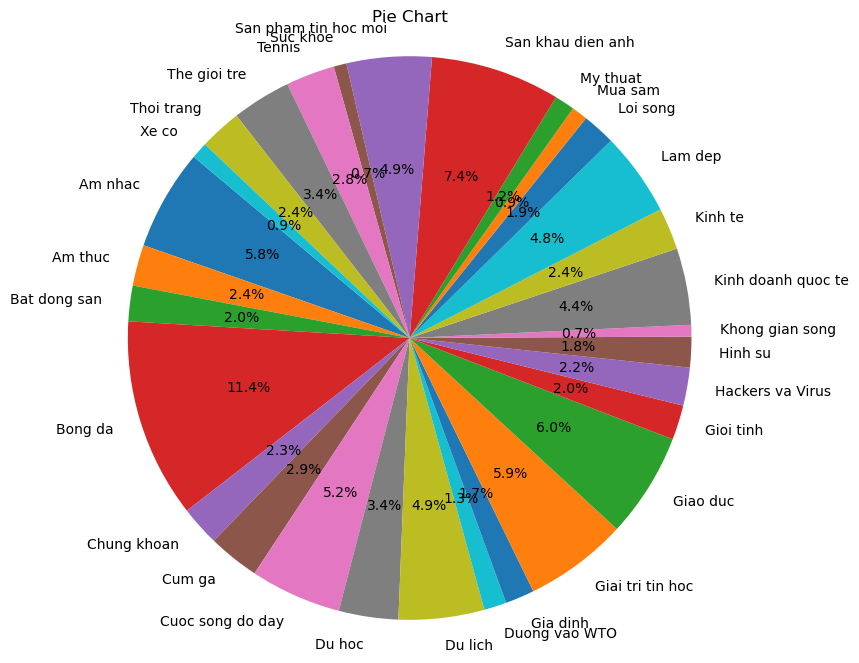

In [51]:

labels = nums_labels.keys()
sizes = nums_labels.values()
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart')
plt.savefig('image/pie_chart')
plt.show()

### Sau tien xu li du lieu

In [41]:
train_x = pickle.load(open('data//saved/train_x.sav','rb'))
train_x

array(['triển_lãm mevs triển_lãm dành riêng xe điện diễn sân vận_động olympic montreal 21 23 2023 xuất_hiện 50 mẫu xe điện 20 thương_hiệu ô_tô thế_giới đầu tham_dự mevs 2023 vinfast giới_thiệu mẫu xe điện chủ_lực nay vf 8 vf 9 khách tham_quan tìm_hiểu thông_tin sản_phẩm chính_sách bán hàng vinfast bà nguyễn thị vân tổng_giám_đốc vinfast bắc mỹ chia_sẻ thương_hiệu thuần điện mục_tiêu thúc_đẩy cuộc cách_mạng xe điện toàn câù vinfast tự_hào góp_mặt triển_lãm xe điện lớn canada ngay triển_lãm ô_tô quốc_tế montreal hồi vinfast ra_mắt tiêu_dùng canada thông_qua cửa_hàng vinfast store mở laval giờ_đây chúng_tôi hào_hứng mang cơ_hội lái thử chiếc xe vf 8 đầu_tiên khách_hàng quebec vf 8 hiện mẫu xe chủ_đạo vinfast thị_trường quốc_tế vf 8 bản eco có_giá 57 500 cad vf 8 plus có_giá 63 490 cad ngoài_ra bản plus thêm tùy_chọn nâng_cấp công_suất 260kw 300kw mức giá tăng thêm 500 cad xe vf 9 mẫu suv cỡ đại mẫu xe lớn dải xe điện vinfast chiều dài cơ_sở 150 mm vf 9 cấu_tạo tối_giản tinh_tế mang không_

In [42]:
new_size = []
for content in train_x:
    new_size.append(sentence_len(content))
print("Do dai trung binh cua tap du lieu sau tien xu li:",np.mean(new_size))

Do dai trung binh cua tap du lieu sau tien xu li: 274.7240242381037


In [43]:
new_nums_words = set()
for content in train_x:
    new_nums_words.update(content.split())
print('So tu sau tien xu li du lieu: ',len(new_nums_words))

So tu sau tien xu li du lieu:  94224
